In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the dataset
data = pd.DataFrame({
    'Study Hours': [1.5, 3.0, 4.5, 6.0, 8.0, 9.5, 10.5, 12.0],
    'Sleep Hours': [8.0, 7.5, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0],
    'Result': [0, 0, 0, 1, 1, 1, 1, 1]
})

# Display the dataset
print(data)


   Study Hours  Sleep Hours  Result
0          1.5          8.0       0
1          3.0          7.5       0
2          4.5          6.5       0
3          6.0          6.0       1
4          8.0          5.5       1
5          9.5          5.0       1
6         10.5          4.5       1
7         12.0          4.0       1


In [6]:
# Define features and target variable
X = data[['Study Hours', 'Sleep Hours']].values
y = data['Result'].values

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
# Predict on test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



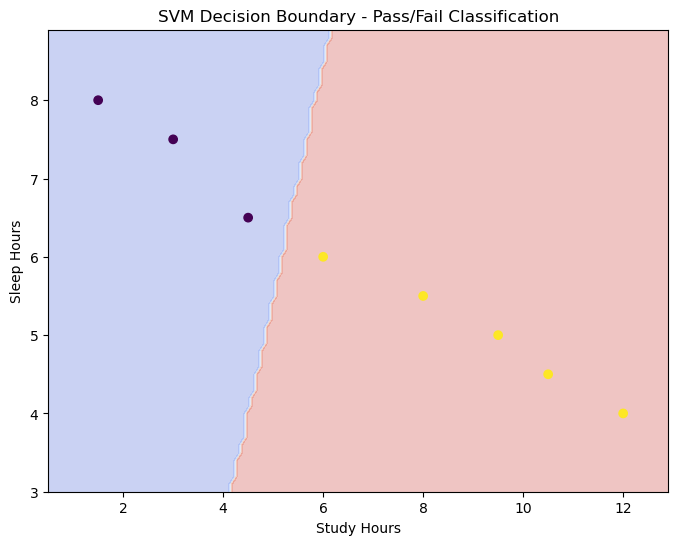

In [13]:
# Plotting decision boundary and data points
plt.figure(figsize=(8, 6))

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Plot decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot data points
plt.scatter(data['Study Hours'], data['Sleep Hours'], c=data['Result'])

plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('SVM Decision Boundary - Pass/Fail Classification')
plt.show()

In [14]:
# User input for prediction
study_hours = float(input("Enter hours of study: "))
sleep_hours = float(input("Enter hours of sleep: "))

# Predict result
user_pred = svm_model.predict([[study_hours, sleep_hours]])
print(f"Predicted Outcome: {'Pass' if user_pred[0] == 1 else 'Fail'}")


Enter hours of study: 2
Enter hours of sleep: 3
Predicted Outcome: Fail
